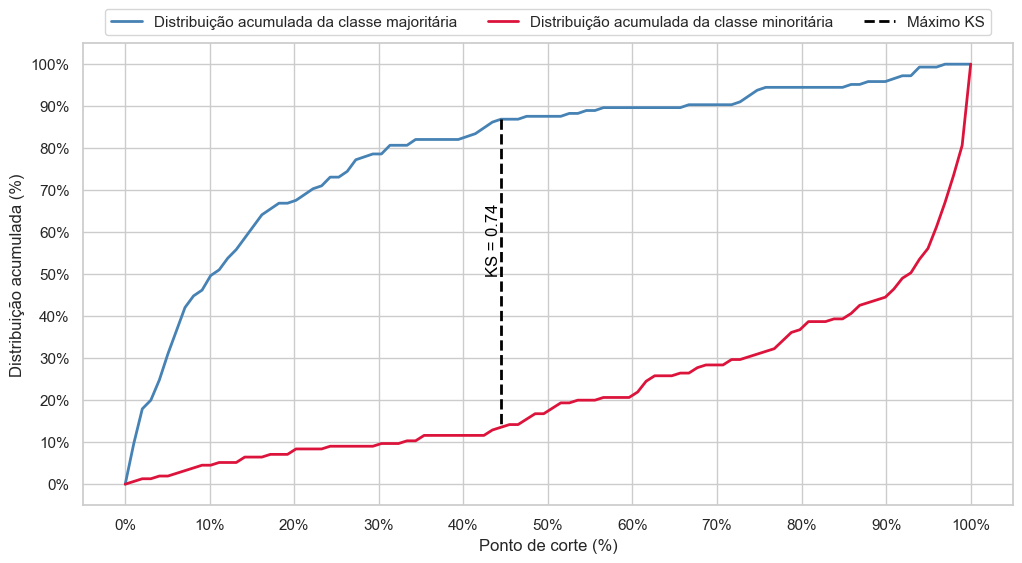

In [96]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo do gráfico
sns.set(style='whitegrid')

# Gerar um conjunto de dados de exemplo
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar um modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Prever as probabilidades no conjunto de teste
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calcular as taxas cumulativas de verdadeiros positivos e falsos positivos
ks_statistic = max(tpr - fpr)
ks_threshold = np.argmax(tpr - fpr)

cutoffs = np.linspace(0, 1, 100)
ecdf_class_0 = np.array([np.mean(y_prob[y_test == 0] <= cutoff) for cutoff in cutoffs])
ecdf_class_1 = np.array([np.mean(y_prob[y_test == 1] <= cutoff) for cutoff in cutoffs])

ecdf_class_0 - ecdf_class_1
max_distance_index = np.argmax(ecdf_class_0 - ecdf_class_1)
max_distance_index

plt.figure(figsize=(12, 6))
plt.plot(cutoffs * 100, ecdf_class_0 * 100, label='Classe 0', color='steelblue', linewidth=2)
plt.plot(cutoffs * 100, ecdf_class_1 * 100, label='Classe 1', color='crimson', linewidth=2)
plt.xlabel('Ponto de corte (%)')
plt.ylabel('Distribuição acumulada (%)')

plt.plot([cutoffs[max_distance_index] * 100, cutoffs[max_distance_index] * 100], 
         [ecdf_class_0[max_distance_index] * 100, ecdf_class_1[max_distance_index] * 100], 
         color='black', linestyle='--', label='Máximo KS', linewidth=2)

plt.text(cutoffs[max_distance_index] * 100, 
         (ecdf_class_0[max_distance_index] + ecdf_class_1[max_distance_index]) * 50, 
         f'KS = {ks_statistic:.2f}', color='black', fontsize=12, ha='right', rotation=90)

plt.xticks(np.arange(0, 101, 10), [f'{x}%' for x in np.arange(0, 101, 10)])
plt.yticks(np.arange(0, 101, 10), [f'{y}%' for y in np.arange(0, 101, 10)])
plt.yticks(np.arange(0, 101, 10))
plt.legend(['Distribuição acumulada da classe majoritária', 'Distribuição acumulada da classe minoritária', 'Máximo KS'], loc='upper center', bbox_to_anchor=(0.5, 1.09), ncol=3)
plt.show()